<a href="https://colab.research.google.com/github/lucasvecchio/HardyL-Stalker-Clark-Kent-Project/blob/master/Analise_DRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=972bcae3e343b20da06afcb4bc276208b32f379ce828740fe84f20f5859789ca
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import pandas as pd
import wget
import zipfile
from google.colab.data_table import DataTable
from google.colab import files
import io
import matplotlib.pyplot as plt

data = files.upload()

In [ ]:
url = 'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/ITR/DADOS/'
file = []
for ano in range (2011,2022):    
    file.append(f'itr_cia_aberta_{ano}.zip')

In [ ]:
for arq in file:
    wget.download(url+arq)

In [ ]:
for arq in file:
    with zipfile.ZipFile(arq, 'r') as zip_ref:
        zip_ref.extractall('cvm')

In [ ]:
nomes = ['BPA_con', 'BPA_ind', 'BPP_con', 'BPP_ind', 'DFC_MD_con', 'DFC_MD_IND', 
         'DFC_MI_con', 'DFC_MI_IND', 'DMPL_con', 'DMPL_ind', 'DRA_con', 'DRA_ind',
         'DRE_con', 'DRE_ind', 'DVA_con', 'DVA_ind']

for nome in nomes:
    arquivo = pd.DataFrame()
    for ano in range(2011,2022):
        arquivo = pd.concat([arquivo,pd.read_csv(f'cvm/itr_cia_aberta_{nome}_{ano}.csv', sep=';', decimal=',', encoding='ISO-8859-1')])
    arquivo.to_csv(f'cvm/itr_cia_aberta_{nome}_2011-2021.csv', index=False)

In [ ]:
dre = pd.read_csv('/itr_cia_aberta_DRA_ind_2011-2021.csv', sep=',', decimal='.', encoding='ISO-8859-1')

In [ ]:
dre = dre[dre['ORDEM_EXERC']=='ÃLTIMO']

In [ ]:
empresas = dre[['DENOM_CIA','CD_CVM']].drop_duplicates().set_index('CD_CVM')

In [ ]:
dre.columns

Index(['CNPJ_CIA', 'DT_REFER', 'VERSAO', 'DENOM_CIA', 'CD_CVM', 'GRUPO_DFP',
       'MOEDA', 'ESCALA_MOEDA', 'ORDEM_EXERC', 'DT_INI_EXERC', 'DT_FIM_EXERC',
       'CD_CONTA', 'DS_CONTA', 'VL_CONTA', 'ST_CONTA_FIXA'],
      dtype='object')

In [ ]:
dre

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
1,00.000.000/0001-91,2011-03-31,1,BCO BRASIL S.A.,1023,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2011-01-01,2011-03-31,4.01,Lucro LÃ­quido do PerÃ­odo,0.0,S
3,00.000.000/0001-91,2011-03-31,1,BCO BRASIL S.A.,1023,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2011-01-01,2011-03-31,4.02,Outros Resultados Abrangentes,0.0,S
5,00.000.000/0001-91,2011-03-31,1,BCO BRASIL S.A.,1023,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2011-01-01,2011-03-31,4.03,Resultado Abrangente do PerÃ­odo,0.0,S
8,00.000.000/0001-91,2011-06-30,1,BCO BRASIL S.A.,1023,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2011-01-01,2011-06-30,4.01,Lucro LÃ­quido do PerÃ­odo,0.0,S
9,00.000.000/0001-91,2011-06-30,1,BCO BRASIL S.A.,1023,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2011-04-01,2011-06-30,4.01,Lucro LÃ­quido do PerÃ­odo,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264412,97.837.181/0001-47,2021-06-30,1,DEXCO S.A.,21091,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2021-04-01,2021-06-30,4.02.03,Ajustes acumulados de conversÃ£o,-203263.0,N
264415,97.837.181/0001-47,2021-06-30,1,DEXCO S.A.,21091,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2021-01-01,2021-06-30,4.02.05,Equiv. Patrim. s/ abrangente de controladas,130992.0,N
264416,97.837.181/0001-47,2021-06-30,1,DEXCO S.A.,21091,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2021-04-01,2021-06-30,4.02.05,Equiv. Patrim. s/ abrangente de controladas,110852.0,N
264419,97.837.181/0001-47,2021-06-30,1,DEXCO S.A.,21091,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2021-01-01,2021-06-30,4.03,Resultado Abrangente do PerÃ­odo,911534.0,S


In [ ]:
DataTable(empresas)

,DENOM_CIA
CD_CVM,
1023,BCO BRASIL S.A.
14206,BRB BCO DE BRASILIA S.A.
2437,CENTRAIS ELET BRAS S.A. - ELETROBRAS
14451,CIA ENERGETICA DE BRASILIA
14540,VBC ENERGIA SA
...,...
25801,RODOBENS SA
25984,COMPANHIA BRASILEIRA DE ALUMÃNIO
25992,INTERCEMENT BRASIL S.A.


In [ ]:
ciel = dre[dre['CD_CVM']==21733]

In [ ]:
ciel

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
1083,01.027.058/0001-91,2011-03-31,1,CIELO S.A.,21733,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2011-01-01,2011-03-31,4.01,Lucro LÃ­quido do PerÃ­odo,424655.0,S
1085,01.027.058/0001-91,2011-03-31,1,CIELO S.A.,21733,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2011-01-01,2011-03-31,4.02,Outros Resultados Abrangentes,0.0,S
1087,01.027.058/0001-91,2011-03-31,1,CIELO S.A.,21733,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2011-01-01,2011-03-31,4.03,Resultado Abrangente do PerÃ­odo,424655.0,S
1090,01.027.058/0001-91,2011-06-30,1,CIELO S.A.,21733,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2011-04-01,2011-06-30,4.01,Lucro LÃ­quido do PerÃ­odo,423577.0,S
1091,01.027.058/0001-91,2011-06-30,1,CIELO S.A.,21733,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2011-01-01,2011-06-30,4.01,Lucro LÃ­quido do PerÃ­odo,848232.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249501,01.027.058/0001-91,2021-06-30,1,CIELO S.A.,21733,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2021-04-01,2021-06-30,4.02,Outros Resultados Abrangentes,-77155.0,S
249504,01.027.058/0001-91,2021-06-30,1,CIELO S.A.,21733,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2021-04-01,2021-06-30,4.02.01,VariaÃ§Ã£o Cambial sobre Investimentos no Exte...,-77155.0,N
249505,01.027.058/0001-91,2021-06-30,1,CIELO S.A.,21733,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2021-01-01,2021-06-30,4.02.01,VariaÃ§Ã£o Cambial sobre Investimentos no Exte...,58535.0,N
249508,01.027.058/0001-91,2021-06-30,1,CIELO S.A.,21733,DF Individual - DemonstraÃ§Ã£o de Resultado Ab...,REAL,MIL,ÃLTIMO,2021-01-01,2021-06-30,4.03,Resultado Abrangente do PerÃ­odo,480209.0,S


In [ ]:
contas = dre[['CD_CONTA','DS_CONTA']].drop_duplicates().set_index('CD_CONTA')

In [ ]:
DataTable(contas)

,DS_CONTA
CD_CONTA,
4.01,Lucro LÃ­quido do PerÃ­odo
4.02,Outros Resultados Abrangentes
4.03,Resultado Abrangente do PerÃ­odo
4.02.02,Ajuste de JCP/Dividendos de perÃ­odos anteriores
4.02.03,Reflexo no investimento de ajustes no PL da Ca...
...,...
4.02.04,ReversÃ£o Perda Atuarial
4.02.05,Outros Ajustes de AvaliaÃ§Ã£o Patrimonial
4.02.06,Resultado Abrangente do PerÃ­odo OperaÃ§Ãµes c...


In [ ]:
lucro_ciel = ciel[ciel["CD_CONTA"]=='4.01']

In [ ]:
lc = lucro_ciel[['DT_REFER','VL_CONTA']].drop_duplicates()

In [ ]:
lc = pd.DataFrame(lc.drop_duplicates(subset=['DT_REFER']).set_index(['DT_REFER']))

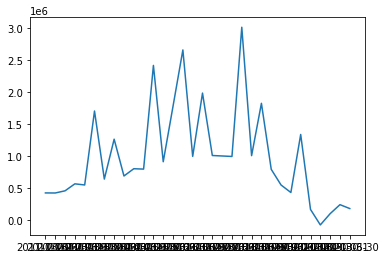

In [ ]:
plt.plot(lc)